<a href="https://colab.research.google.com/github/Azure06072005/DS317-Data-Mining-for-Enterprise/blob/main/reply_user_video_eda_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%run '/content/drive/MyDrive/Colab Notebooks/MOOCubeX_dataset.ipynb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (97.1 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to 

# Reply DataFrame

In [4]:
df_reply.show(30, truncate=True)

+-------------------+-----+-------------------------------------+----------+
|        create_time|   id|                                 text|   user_id|
+-------------------+-----+-------------------------------------+----------+
|2019-08-05 12:55:54| Rp_1|                             测试回复|U_10030806|
|2019-08-09 16:39:06| Rp_2|                                   赞|U_10031397|
|2019-08-10 22:39:35| Rp_3|                               好喜欢|U_10031531|
|2019-08-12 14:43:34| Rp_4|                             你也好棒|U_10031508|
|2019-08-12 14:44:51| Rp_5|                                 嗯对|U_10031508|
|2019-08-12 14:47:58| Rp_6|                           人工智能是|U_10031508|
|2019-08-13 09:41:32| Rp_7|           我的观点就是，你说啥就时啥|U_10031536|
|2019-08-13 09:41:42| Rp_8|           我的观点就是，你说啥就时啥|U_10031536|
|2019-08-13 09:41:53| Rp_9|           我的观点就是，你说啥就时啥|U_10031536|
|2019-08-13 09:41:59|Rp_10|           我的观点就是，你说啥就时啥|U_10031536|
|2019-08-19 18:08:53|Rp_11|                                11111|U_100

In [5]:
df_reply.printSchema()

root
 |-- create_time: string (nullable = true)
 |-- id: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)



In [6]:
df_reply.describe()

DataFrame[summary: string, create_time: string, id: string, text: string, user_id: string]

In [7]:
from pyspark.sql import functions as F
miss = df_reply.select([
    F.sum(F.col(c).isNull().cast("int")).alias(c)
    for c in df_reply.columns
])

miss.show()

+-----------+---+----+-------+
|create_time| id|text|user_id|
+-----------+---+----+-------+
|          0|  0|   0|      0|
+-----------+---+----+-------+



In [8]:
df_reply.describe().show(truncate=False)

+-------+-------------------+--------+---------------------+----------+
|summary|create_time        |id      |text                 |user_id   |
+-------+-------------------+--------+---------------------+----------+
|count  |331011             |331011  |331011               |331011    |
|mean   |NULL               |NULL    |5.017241089215226E24 |NULL      |
|stddev |NULL               |NULL    |1.6686278219729687E26|NULL      |
|min    |2019-08-05 12:55:54|Rp_1    |!                    |U_10000657|
|max    |2020-11-15 03:56:04|Rp_99999|󠀋・ࡇ・              |U_9999609 |
+-------+-------------------+--------+---------------------+----------+



In [9]:
from pyspark.sql.functions import count

# Group by user_id and count the number of replies for each user
reply_counts = df_reply.groupBy("user_id").agg(count("text").alias("reply_count"))

# Order by reply_count in descending order and get the top 10
top_10_repliers = reply_counts.orderBy("reply_count", ascending=False).limit(10)

# Show the result
top_10_repliers.show()

+----------+-----------+
|   user_id|reply_count|
+----------+-----------+
|U_12137387|      22477|
| U_3558829|      11773|
|U_15053528|      10013|
|U_10842547|       8291|
| U_9741717|       5796|
|U_10238951|       4811|
|U_10842580|       3804|
| U_8264065|       3773|
|U_15092855|       3293|
|U_15092062|       3249|
+----------+-----------+



/tmp/ipython-input-568307334.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


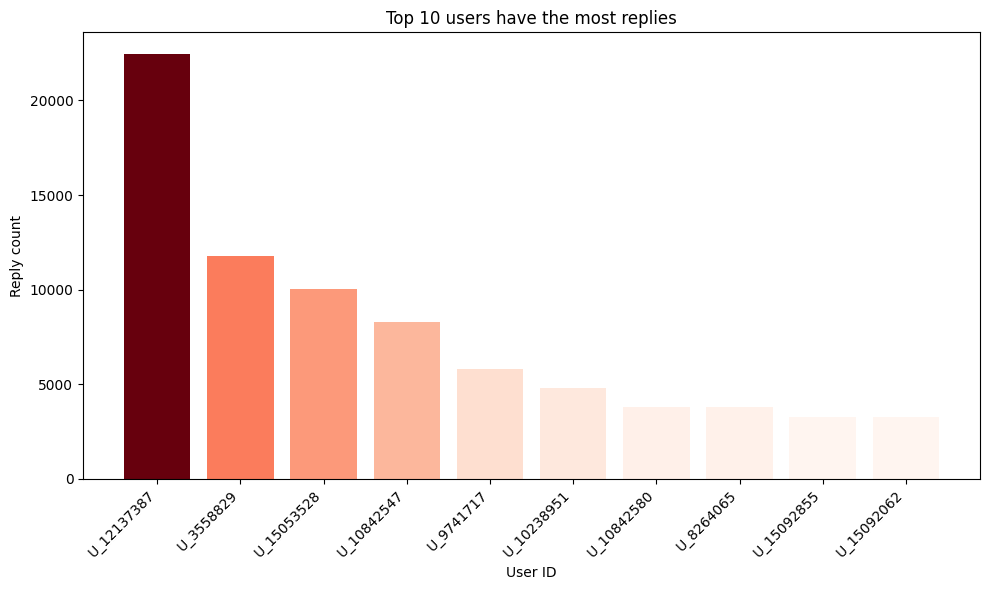

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

top_10_repliers_list = top_10_repliers.collect()

user_ids = [row['user_id'] for row in top_10_repliers_list]
reply_counts = [row['reply_count'] for row in top_10_repliers_list]

# Create a colormap and normalize the colors based on reply count
cmap = cm.get_cmap('Reds')
normalize = plt.Normalize(min(reply_counts), max(reply_counts))
colors = [cmap(normalize(count)) for count in reply_counts]


plt.figure(figsize=(10, 6))
plt.bar(user_ids, reply_counts, color=colors)
plt.xlabel("User ID")
plt.ylabel("Reply count")
plt.title("Top 10 users have the most replies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

+-----------------+------------------+
|             mean|            stddev|
+-----------------+------------------+
|6.579035239401348|146.41203644703566|
+-----------------+------------------+

25th percentile (Q1): 1.0
50th percentile (Median): 1.0
75th percentile (Q3): 2.0


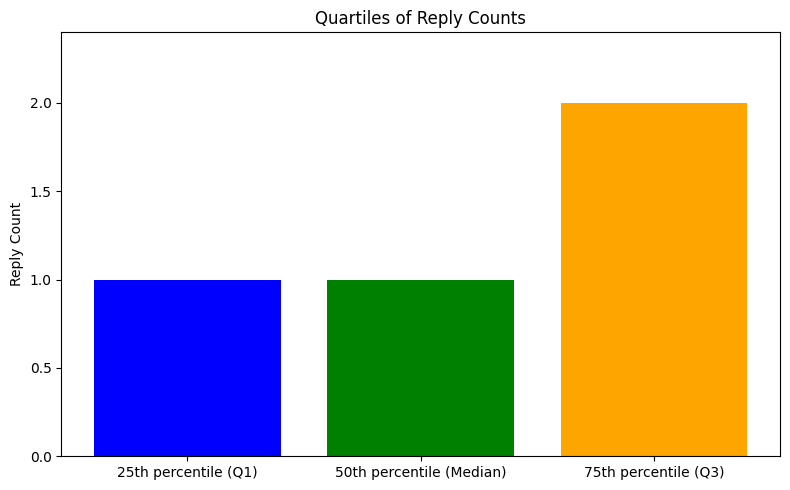

In [13]:
from pyspark.sql.functions import count, mean, stddev, percentile_approx

# Group by user_id and count the number of replies for each user (re-creating reply_counts DataFrame)
reply_counts = df_reply.groupBy("user_id").agg(count("text").alias("reply_count"))

# Calculate mean and standard deviation of reply counts from the DataFrame
mean_stddev = reply_counts.agg(mean("reply_count").alias("mean"),
                                 stddev("reply_count").alias("stddev"))
mean_stddev.show()

# Calculate quartiles (25%, 50%, 75%) of reply counts from the DataFrame
quantiles = reply_counts.approxQuantile("reply_count", [0.25, 0.5, 0.75], 0.01)

# Extract quartile values
q1 = quantiles[0]
median = quantiles[1]
q3 = quantiles[2]

print(f"25th percentile (Q1): {q1}")
print(f"50th percentile (Median): {median}")
print(f"75th percentile (Q3): {q3}")

# Prepare data for plotting quartiles
labels = ['25th percentile (Q1)', '50th percentile (Median)', '75th percentile (Q3)']
values = [q1, median, q3]

# Create a bar plot for quartiles
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.ylabel('Reply Count')
plt.title('Quartiles of Reply Counts')
plt.ylim(0, max(values) * 1.2) # Adjust y-axis limit for better visualization
plt.tight_layout()
plt.show()

# User-video

In [15]:
df_user_video = spark.read.parquet(BASE_DIR + '/relations/user-video/user-video-seg*.parquet')
df_user_video.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
df_user_video_json = spark.read.json(BASE_DIR + '/relations/user-video.json')
df_user_video_json.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------